# Pymaceuticals Inc.
---

### Analysis

* A positive correlation was found between mouse weight and average tumor volume for Capomulin regimen. The calculated P-value of 0.84 shows that as the size of the tumor declined so did the average weight of the mouse.

* Regimens Campulin and Ramicane had the highest number of data points and lowest average tumor volume in the sample set.
 

In [243]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [23]:
# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how='left',on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_metadata['Mouse ID'].count()


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dups_df = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mouse = dups_df['Mouse ID'].unique()
dup_mouse


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
combined_df.loc[combined_df['Mouse ID'].isin(dup_mouse)]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df = combined_df.drop(combined_df[combined_df['Mouse ID'].isin(dup_mouse)].index)
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
len(combined_df['Mouse ID'].unique())

248

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

tumor_vol_mean    = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
tumor_vol_meadian = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
tumor_vol_var     = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
tumor_vol_std_dev = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
tumor_vol_sem     = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Combine the stats into a dictionary and store in a dataframe
stats_df = pd.DataFrame(
                          {"Mean Tumor Volume":tumor_vol_mean,
                           "Median Tumor Volume":tumor_vol_meadian,
                           "Tumor Volume Variance":tumor_vol_var,
                           "Tumor Volume Std. Dev.":tumor_vol_std_dev,
                           "Tumor Volume Std. Err.":tumor_vol_sem
                          }
    
)

stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [46]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summ_df = combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std','sem'])
agg_summ_df.head(10)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

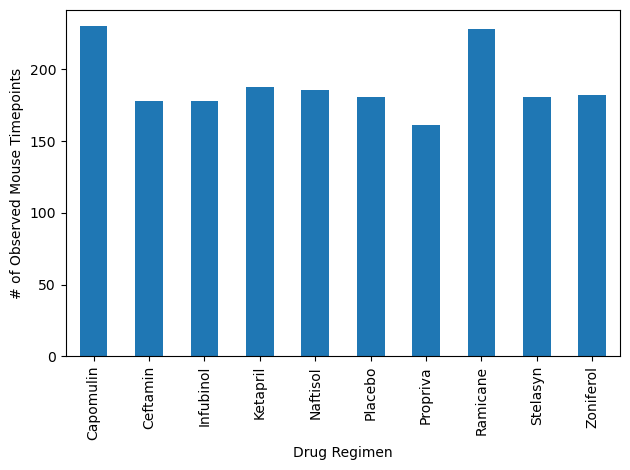

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_bar_df = combined_df.groupby(['Drug Regimen'])['Mouse ID'].count()
mice_bar_df.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()
plt.show()


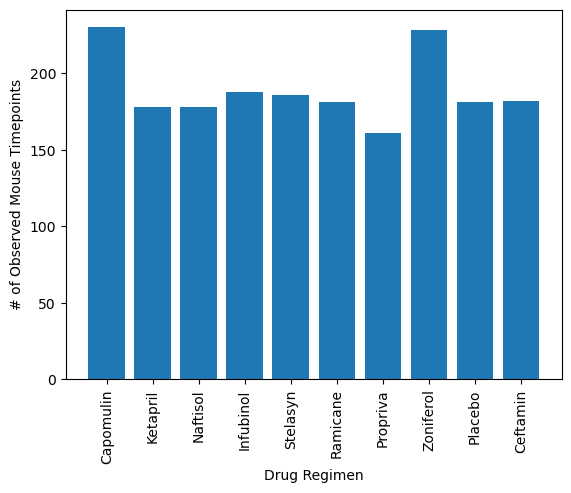

In [62]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

x_axis = combined_df['Drug Regimen'].unique()
y_axis = combined_df.groupby(['Drug Regimen'])['Mouse ID'].count()
plt.bar(x_axis, y_axis)
ticks = x_axis
plt.xticks(ticks, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


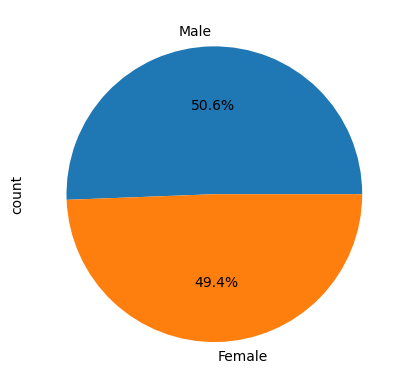

In [71]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study


# mice_gender_df.head()

# Get the unique mice with their gender
mice_gender_df = combined_df['Sex'].value_counts()
# mice_gender_df = combined_df.groupby(['Sex']).count()['Mouse ID']

# Make the pie chart
mice_gender_df.plot(kind='pie', autopct='%1.1f%%')
plt.show()


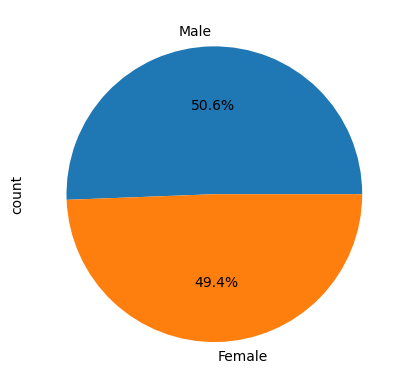

In [76]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender_df = combined_df['Sex'].value_counts()
plt.pie(mice_gender_df, labels=mice_gender_df.index.values, autopct='%1.1f%%')
plt.ylabel('count')
plt.show()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [91]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
latest_time = combined_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combined_max_df = pd.merge(latest_time, combined_df, on=('Mouse ID', 'Timepoint'), how='left')
combined_max_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [104]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# filter dataframe to include just the 4 drug regimens
max_filtered_df = pd.DataFrame(combined_max_df[combined_max_df['Drug Regimen'].isin(treatments)])


# Create empty list to fill with tumor vol data (for plotting)
vol_data = {
            'Capomulin':[],
            'Ramicane':[],
            'Infubinol':[],
            'Ceftamin':[]
           }


for index, row in max_filtered_df.iterrows():
    vol_data[row['Drug Regimen']].append(row['Tumor Volume (mm3)'])
    # print(index, row['Drug Regimen'], row['Tumor Volume (mm3)'])

vol_data = pd.DataFrame(vol_data)
vol_data

    # add subset


    # Determine outliers using upper and lower bounds


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


In [115]:
# Created function to calculate IQR Statistics
# Function will return a dictionary of the staticstics elements to determine outliers in the sample data
# Called by function that will loop through the specified drug regimens
def CalculateIQRStatistics(drug_name, df):
    quartile = df[drug_name].quantile([0.25,0.5,0.75])
    low = quartile[0.25]
    med = quartile[0.5]
    up  = quartile[0.75]
    iqr = up - low
    low_bnd = low - (1.5 * iqr)
    up_bnd  = up + (1.5 * iqr)
    max     = df[drug_name].max()
    min     = df[drug_name].min()    
    
    results= {
              'drug':drug_name,
              'lower_quartile':quartile[0.25],
              'medium_quartile':quartile[0.5],
              'upper_quartile':quartile[0.75],
              'iqr':quartile[0.75] - quartile[0.25],
              'lower_bound':low_bnd,
              'upper_bound':up_bnd,
              'max':max,
              'min':min            
             }
    
    return results

In [122]:
# Wrapper function that will loop throug drug regimens and 
# append each drug iqr statistics into a data frame
def WrapperIQRStats(drug_treatments):
    stats = []
    
    for drug in drug_treatments:
        stats.append(CalculateIQRStatistics(drug, vol_data))
    
    return pd.DataFrame(stats)

In [124]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# function loops through the 4 drug regimens in list treatments
# Calculates the statistics data elements for each drug and returns them in a DataFrame 
results = WrapperIQRStats(treatments)
results


,drug,lower_quartile,medium_quartile,upper_quartile,iqr,lower_bound,upper_bound,max,min
0,Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015,47.685963,23.343598
1,Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811,45.220869,22.050126
2,Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446,72.226731,36.321346
3,Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458,68.923185,45.000000


In [230]:
# Outliers - Locate the rows which contain mice on each drug and get the tumor volumes

# loop through the results dataframe and search the filtered subset dataframe for outliers
msg = ''
for index, row in results.iterrows():
    subset = max_filtered_df.loc[(max_filtered_df['Drug Regimen'] == row.drug)]
    subset = subset.loc[(subset['Tumor Volume (mm3)'] <= row.lower_bound) | (subset['Tumor Volume (mm3)'] >= row.upper_bound)]
    print (row.drug, subset.index, subset['Tumor Volume (mm3)'])
    if len(subset) > 0:
        msg=msg + f"------------------------\nOutliers:\nDrug: {row.drug} - Tumor Volume (mm3); {subset['Tumor Volume (mm3)']}\n"

print(msg)


Capomulin Index([], dtype='int64') Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Index([], dtype='int64') Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Index([31], dtype='int64') 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin Index([], dtype='int64') Series([], Name: Tumor Volume (mm3), dtype: float64)
------------------------
Outliers:
Drug: Infubinol - Tumor Volume (mm3); 31    36.321346
Name: Tumor Volume (mm3), dtype: float64



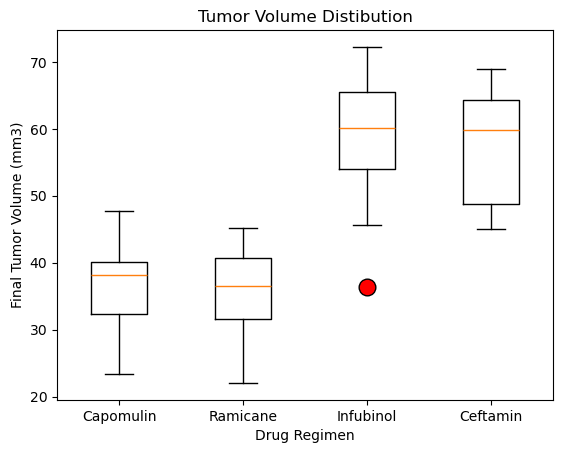

In [197]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
myflierprops = dict(marker='o',markerfacecolor='red',markersize=12,linestyle='none',markeredgecolor='black')

fig1 = ax1.boxplot(vol_data, labels=treatments, flierprops=myflierprops)
ax1.set_title('Tumor Volume Distibution')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

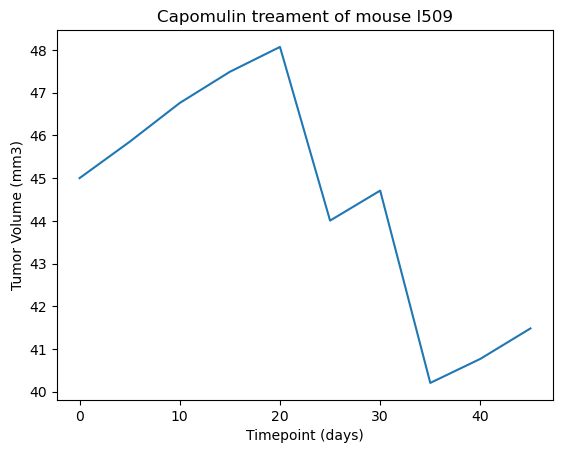

In [210]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
drug_regimen = 'Capomulin'

mouse_line_df = combined_df[(combined_df['Mouse ID'] == mouse_id) & (combined_df['Drug Regimen'] == drug_regimen)]
plt.plot(mouse_line_df['Timepoint'], mouse_line_df['Tumor Volume (mm3)'])
plt.title(f'{drug_regimen} treament of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

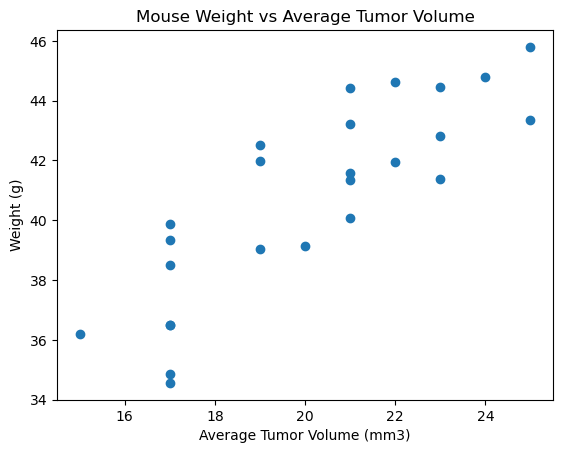

In [238]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
drug_regimen = 'Capomulin'
drug_df = combined_df[(combined_df['Drug Regimen'] == drug_regimen)][['Mouse ID','Weight (g)','Tumor Volume (mm3)']]

drug_avgs_df = drug_df.groupby(['Mouse ID']).mean()
plt.scatter(drug_avgs_df['Weight (g)'], drug_avgs_df['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.show()


In [ ]:
drug_df = combined_df[(combined_df['Drug Regimen'] == drug_regimen)]

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


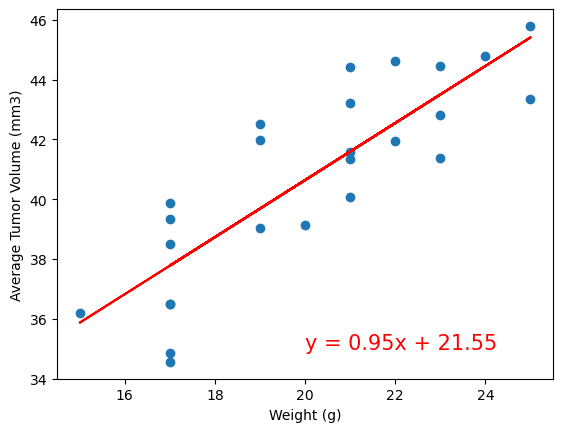

In [266]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_calc = st.pearsonr(drug_avgs_df['Weight (g)'], drug_avgs_df['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {round(corr_calc[0], 2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(drug_avgs_df['Weight (g)'], drug_avgs_df['Tumor Volume (mm3)'])
regress_values = drug_avgs_df['Weight (g)'] * slope + intercept

line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

plt.scatter(drug_avgs_df['Weight (g)'], drug_avgs_df['Tumor Volume (mm3)'])
plt.plot(drug_avgs_df['Weight (g)'], regress_values, 'r-')
plt.annotate(line_eq, (20,35),fontsize=15, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
